<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/AtomGPT_SLMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interacting with AtomGPT.org API

https://github.com/atomgptlab/agapi

https://arxiv.org/abs/2512.11935

https://www.youtube.com/watch?v=5Z25-3488K4&t

In [7]:
BASE = "https://atomgpt.org"
API_KEY = "sk-X"

Band gap (eV): 1.1596216071003669


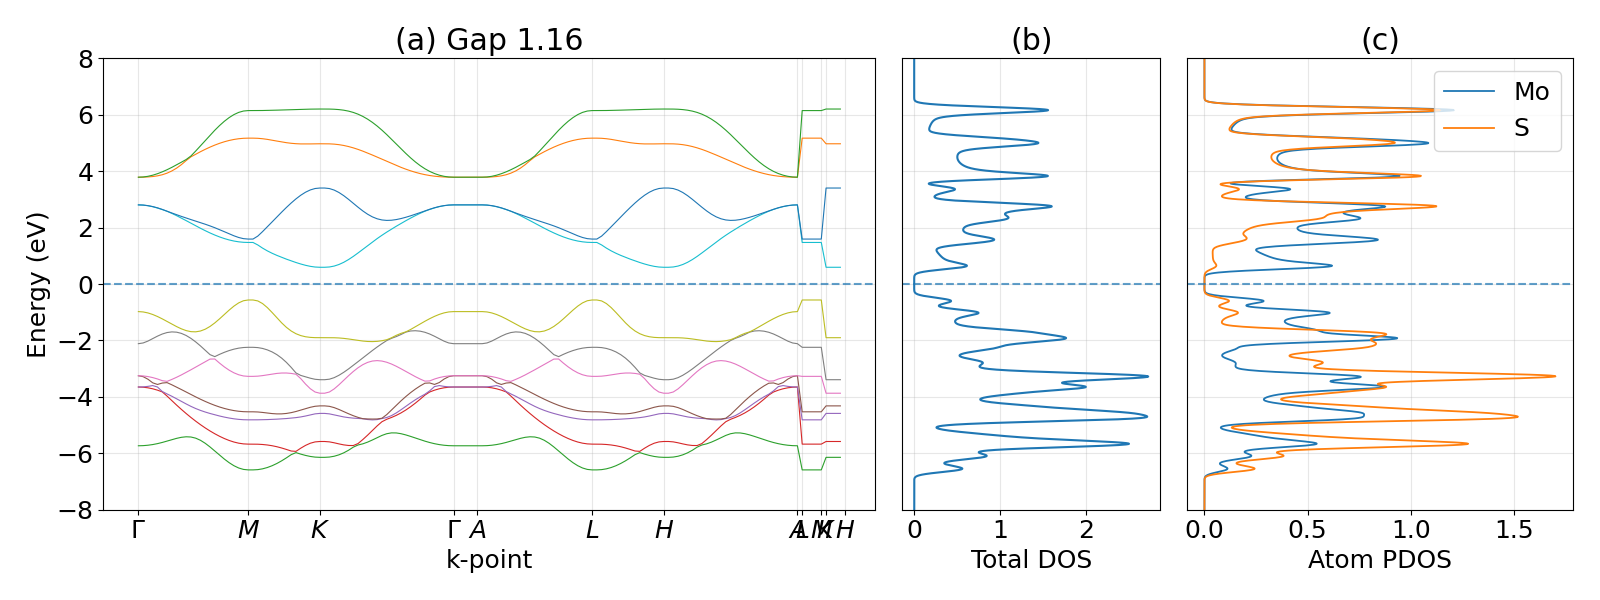

In [6]:
#!/usr/bin/env python3
import requests
from IPython.display import Image, display

URL = f"{BASE}/slakonet/bandstructure"

POSCAR = """MoS2
1.0
3.19 0 0
-1.595 2.7627 0
0 0 20
Mo S
1 2
direct
0.333333 0.666667 0.5
0.666667 0.333333 0.577055
0.666667 0.333333 0.422945
"""

r = requests.get(URL, params={"APIKEY": API_KEY, "poscar": POSCAR})

open("bandstructure.png", "wb").write(r.content)
print("Band gap (eV):", r.headers.get("X-Band-Gap"))

display(Image("bandstructure.png"))


In [9]:
import pandas as pd
# === ALIGNN Predictions ===
r = requests.get(f"{BASE}/alignn/query", params={"APIKEY": API_KEY, "poscar": POSCAR})
data = r.json()

props = pd.DataFrame({
    "Property": ["Formation Energy", "Band Gap (MBJ)", "Bulk Modulus"],
    "Value": [
        f"{data['jv_formation_energy_peratom_alignn'][0]:.3f} eV/atom",
        f"{data['jv_mbj_bandgap_alignn'][0]:.3f} eV",
        f"{data['jv_bulk_modulus_kv_alignn'][0]:.1f} GPa"
    ]
})
display(props)

# === ALIGNN-FF Relaxation ===
r = requests.get(f"{BASE}/alignn_ff/relax", params={"APIKEY": API_KEY, "poscar": POSCAR})
print("\n🔧 Relaxed Structure:\n")
print(r.text)
open("relaxed.vasp", "w").write(r.text)

# === ALIGNN-FF Energy ===
r = requests.get(f"{BASE}/alignn_ff/query", params={"APIKEY": API_KEY, "poscar": POSCAR})
print(f"\n⚡ Energy: {r.json()['energy_eV']:.4f} eV")

,Property,Value
0,Formation Energy,-0.914 eV/atom
1,Band Gap (MBJ),0.789 eV
2,Bulk Modulus,62.3 GPa



🔧 Relaxed Structure:

System
1.0
3.2279243195510685 -7.386000240970335e-08 -5.9468820077798486e-18
-1.613962223742001 2.795532883344561 4.503333219455218e-18
-3.728452669454449e-17 1.1075340902488833e-17 20.081641736043952
Mo S 
1 2 
direct
0.33333578019910265 0.6666704516579176 0.5000000432246556 Mo
0.6666665985771616 0.3333319397618998 0.5848431334778444 S
0.6666665985771616 0.3333319397618998 0.41515695297146654 S


⚡ Energy: -15.1854 eV
